In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


read data


In [3]:
domestics_tourism = pd.read_csv('data\domestic-tourists-number-and-spending-by-destination-provinces-2.txt',delimiter=';')
print(len(domestics_tourism))
domestics_tourism.head()


1008


,Date,Indicator,Province,Value
0,2023-01,Tourists Number (Overnight Visitors),Al Bahah,39183.0
1,2022-02,Tourists Number (Overnight Visitors),Al Bahah,37792.0
2,2023-05,Tourists Number (Overnight Visitors),Al Bahah,60160.0
3,2021-09,Tourists Number (Overnight Visitors),Al Bahah,56620.0
4,2022-10,Tourists Number (Overnight Visitors),Al Bahah,31937.0


In [4]:
inbound_tourism = pd.read_csv('data\inbound-tourists-number-and-spending-by-destination-main-cities-2.txt',delimiter=';')
print(len(inbound_tourism))
inbound_tourism.head()

2362


,Date,Indicator,Province,Destination,value
0,2021-March,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,31.000000
1,2023-May,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1188.000000
2,2023-October,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1703.000000
3,2022-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,123.146793
4,2023-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,415.000000


# In The Domestics Tourism

In [5]:
domestics_tourism.head()

,Date,Indicator,Province,Value
0,2023-01,Tourists Number (Overnight Visitors),Al Bahah,39183.0
1,2022-02,Tourists Number (Overnight Visitors),Al Bahah,37792.0
2,2023-05,Tourists Number (Overnight Visitors),Al Bahah,60160.0
3,2021-09,Tourists Number (Overnight Visitors),Al Bahah,56620.0
4,2022-10,Tourists Number (Overnight Visitors),Al Bahah,31937.0


# split the date into year, month and day

In [6]:
domestics_tourism['year']=domestics_tourism['Date'].apply(lambda x:str(x).split('-')[0])
domestics_tourism['month']=domestics_tourism['Date'].apply(lambda x:str(x).split('-')[1])
domestics_tourism.drop('Date',axis=1,inplace=True)
domestics_tourism.head()

,Indicator,Province,Value,year,month
0,Tourists Number (Overnight Visitors),Al Bahah,39183.0,2023,01
1,Tourists Number (Overnight Visitors),Al Bahah,37792.0,2022,02
2,Tourists Number (Overnight Visitors),Al Bahah,60160.0,2023,05
3,Tourists Number (Overnight Visitors),Al Bahah,56620.0,2021,09
4,Tourists Number (Overnight Visitors),Al Bahah,31937.0,2022,10


# get null vaules

In [7]:
domestics_tourism.isna().sum()

Indicator    0
Province     0
Value        0
year         0
month        0
dtype: int64

# Drop dubplicate rows


In [8]:
domestics_tourism.drop_duplicates(inplace=True)

# remove the outliner

In [9]:
from scipy import stats
domestics_tourism['Z-Score'] = np.abs(stats.zscore(domestics_tourism['Value']))

domestics_tourism = domestics_tourism[domestics_tourism['Z-Score'] <= 3].drop(columns=['Z-Score'])
domestics_tourism.head()

,Indicator,Province,Value,year,month
0,Tourists Number (Overnight Visitors),Al Bahah,39183.0,2023,01
1,Tourists Number (Overnight Visitors),Al Bahah,37792.0,2022,02
2,Tourists Number (Overnight Visitors),Al Bahah,60160.0,2023,05
3,Tourists Number (Overnight Visitors),Al Bahah,56620.0,2021,09
4,Tourists Number (Overnight Visitors),Al Bahah,31937.0,2022,10


In [10]:
domestics_tourism.to_csv("domestics_tourism.csv")

# Domestics Tourism Data visulization

C:\Users\mahmo\AppData\Local\Temp\ipykernel_23836\1045344945.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=domestics_tourism, x="year", y="Value", hue="Province", estimator="sum", ci=None)


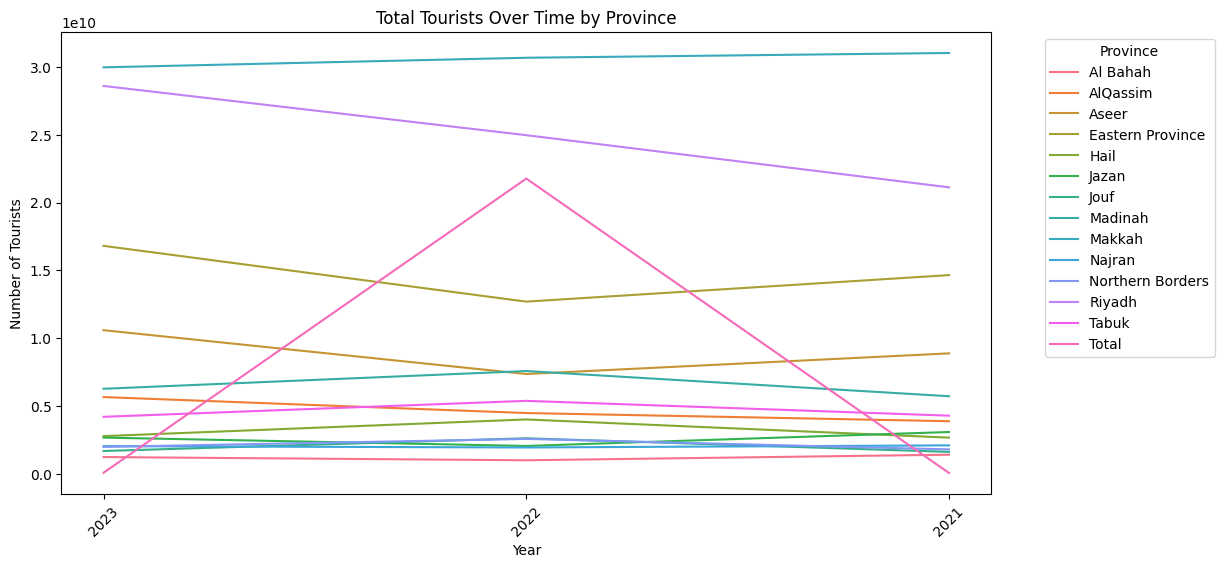

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=domestics_tourism, x="year", y="Value", hue="Province", estimator="sum", ci=None)
plt.title("Total Tourists Over Time by Province")
plt.xlabel("Year")
plt.ylabel("Number of Tourists")
plt.xticks(rotation=45)
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

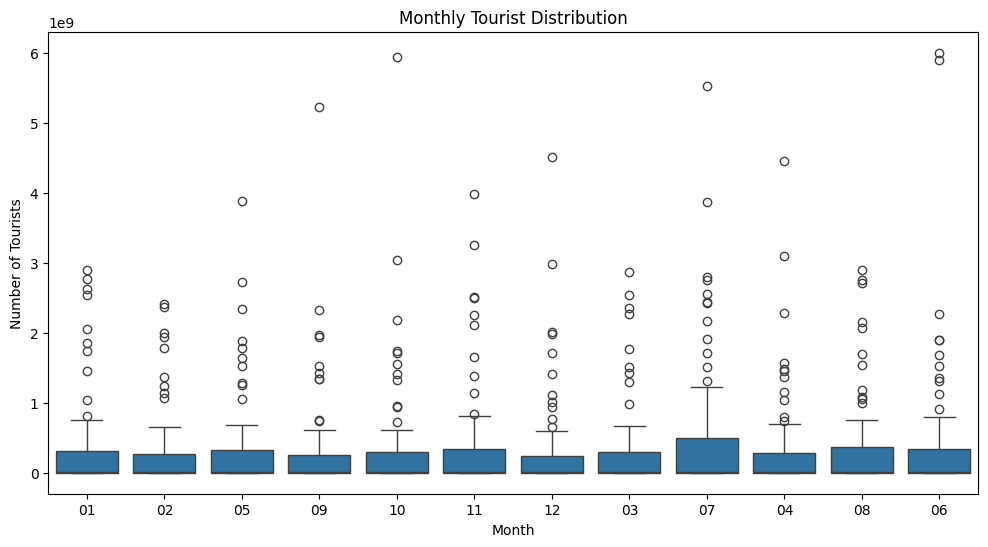

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=domestics_tourism, x="month", y="Value")
plt.title("Monthly Tourist Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Tourists")
plt.show()

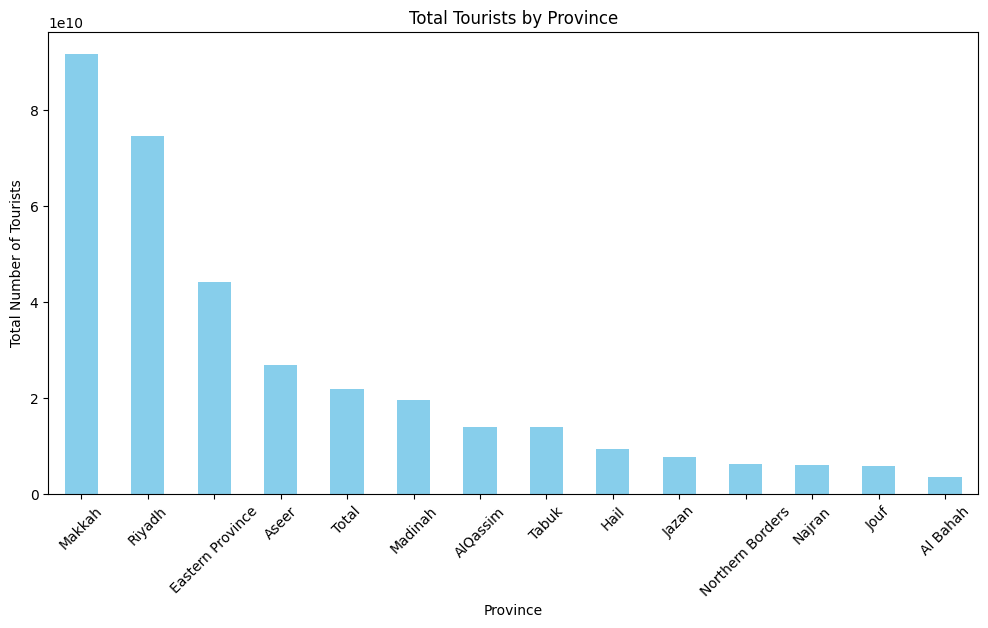

In [13]:
top_provinces = domestics_tourism.groupby("Province")["Value"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_provinces.plot(kind="bar", color="skyblue")
plt.title("Total Tourists by Province")
plt.xlabel("Province")
plt.ylabel("Total Number of Tourists")
plt.xticks(rotation=45)
plt.show()


# Data minning from the dataset

In [14]:
summary_stats = domestics_tourism.describe()
top_5_provinces = domestics_tourism.groupby("Province")["Value"].sum().sort_values(ascending=False).head(5)
yearly_totals = domestics_tourism.groupby("year")["Value"].sum()
peak_year = yearly_totals.idxmax()
peak_year_value = yearly_totals.max()
monthly_avg = domestics_tourism.groupby("month")["Value"].mean()
peak_month = monthly_avg.idxmax()
peak_month_value = monthly_avg.max()
most_common_indicator = domestics_tourism["Indicator"].value_counts().idxmax()

In [15]:
print("Statistical Summary:\n", summary_stats)


Statistical Summary:
               Value
count  9.760000e+02
mean   3.544908e+08
std    7.576030e+08
min    2.016800e+04
25%    2.617720e+05
50%    6.467014e+06
75%    3.283162e+08
max    6.001154e+09


In [16]:
print("Top 5 Provinces:\n", top_5_provinces)


Top 5 Provinces:
 Province
Makkah              9.165512e+10
Riyadh              7.467524e+10
Eastern Province    4.414816e+10
Aseer               2.682673e+10
Total               2.190941e+10
Name: Value, dtype: float64


In [17]:
print(f"Peak Year: {peak_year} with {peak_year_value} tourists")


Peak Year: 2022 with 129100708337.58 tourists


In [18]:
print(f"Peak Month: {peak_month} with {peak_month_value} tourists")


Peak Month: 07 with 529476604.4287655 tourists


In [19]:
print(f"Most Common Indicator: {most_common_indicator}")

Most Common Indicator: Tourists Number (Overnight Visitors)


In [20]:
total_tourists = domestics_tourism[domestics_tourism['Indicator'] == 'Tourists Number (Overnight Visitors)'].groupby('year')['Value'].sum()
total_spending = domestics_tourism[domestics_tourism['Indicator'] == 'Tourists Spending (SAR)'].groupby('year')['Value'].sum()

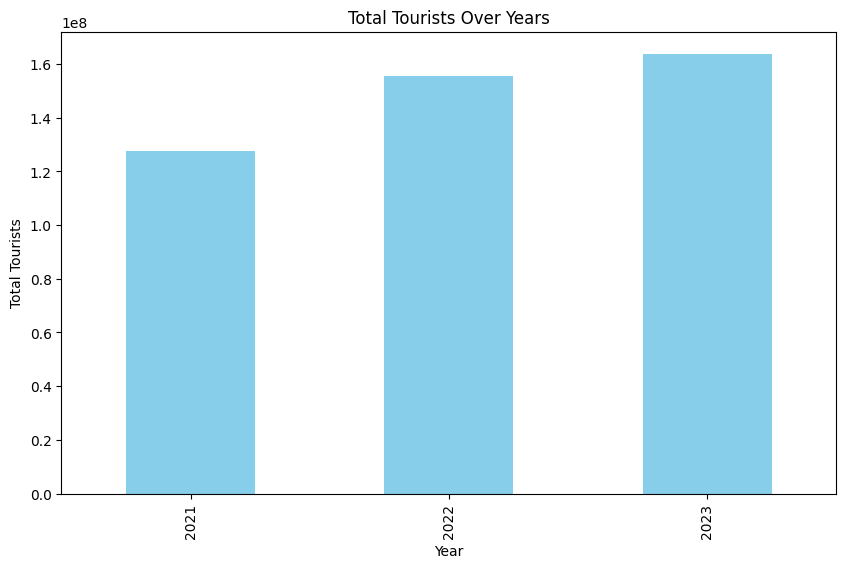

In [21]:
plt.figure(figsize=(10, 6))
total_tourists.plot(kind='bar', color='skyblue')
plt.title('Total Tourists Over Years')
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.show()

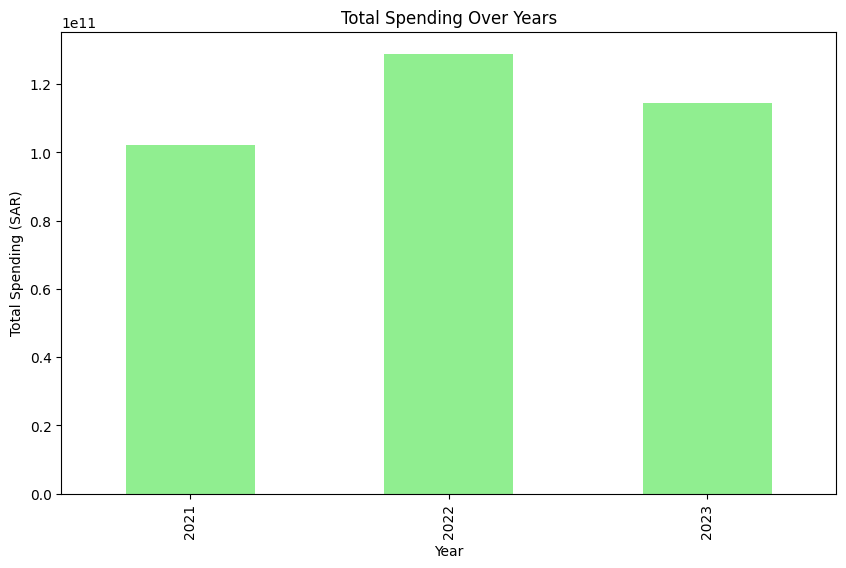

In [22]:
# Plotting Total Spending Over Years
plt.figure(figsize=(10, 6))
total_spending.plot(kind='bar', color='lightgreen')
plt.title('Total Spending Over Years')
plt.xlabel('Year')
plt.ylabel('Total Spending (SAR)')
plt.show()

In [23]:
monthly_tourists = domestics_tourism[domestics_tourism['Indicator'] == 'Tourists Number (Overnight Visitors)'].groupby('month')['Value'].sum()
monthly_spending = domestics_tourism[domestics_tourism['Indicator'] == 'Tourists Spending (SAR)'].groupby('month')['Value'].sum()


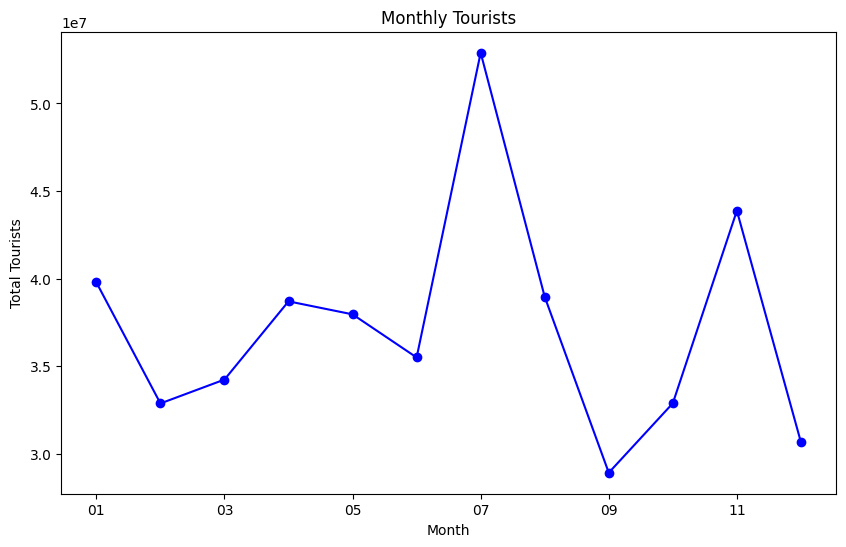

In [24]:
plt.figure(figsize=(10, 6))
monthly_tourists.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Tourists')
plt.xlabel('Month')
plt.ylabel('Total Tourists')
plt.show()



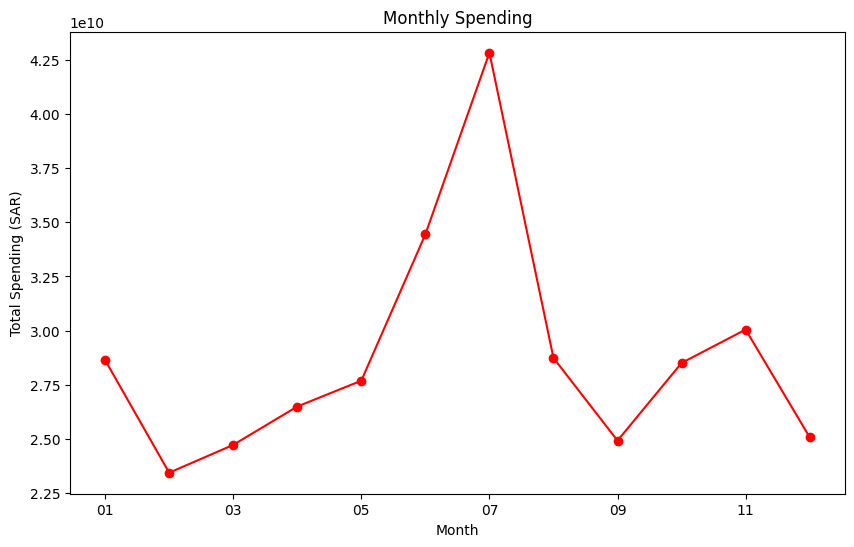

In [25]:
plt.figure(figsize=(10, 6))
monthly_spending.plot(kind='line', marker='o', color='red')
plt.title('Monthly Spending')
plt.xlabel('Month')
plt.ylabel('Total Spending (SAR)')
plt.show()

# data transfromation and Encodeing

In [26]:
numerical_features = domestics_tourism.select_dtypes(include=['int64', 'float64']).columns
categorical_features = domestics_tourism.select_dtypes(include=['object']).columns

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer



In [28]:
numerical_transformer = StandardScaler()
categorical_transformer =OneHotEncoder (handle_unknown='ignore')

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [30]:
numerical_features

Index(['Value'], dtype='object')

In [31]:
categorical_features

Index(['Indicator', 'Province', 'year', 'month'], dtype='object')

In [32]:
domestics_tourismTF=preprocessor.fit_transform(domestics_tourism)
domestics_tourismTF

<976x32 sparse matrix of type '<class 'numpy.float64'>'
	with 4880 stored elements in Compressed Sparse Row format>

# inbound_tourism Datasets

In [33]:
inbound_tourism.head()

,Date,Indicator,Province,Destination,value
0,2021-March,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,31.000000
1,2023-May,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1188.000000
2,2023-October,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1703.000000
3,2022-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,123.146793
4,2023-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,415.000000


# Data reading

In [34]:
inbound_tourism = pd.read_csv('data\inbound-tourists-number-and-spending-by-destination-main-cities-2.txt',delimiter=';')
print(len(inbound_tourism))
inbound_tourism.head()

2362


,Date,Indicator,Province,Destination,value
0,2021-March,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,31.000000
1,2023-May,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1188.000000
2,2023-October,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1703.000000
3,2022-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,123.146793
4,2023-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,415.000000


## Handel the data and Split the date into year and month and encode the month

In [35]:
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

inbound_tourism['year']=inbound_tourism['Date'].apply(lambda x:str(x).split('-')[0])
inbound_tourism['month']=inbound_tourism['Date'].apply(lambda x:month_dict[str(x).split('-')[1]])
inbound_tourism.drop(['Date','Destination'],axis=1,inplace=True)
inbound_tourism.head()

,Indicator,Province,value,year,month
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11


## Check null values

In [36]:
inbound_tourism.isna().sum()

Indicator      0
Province       0
value        110
year           0
month          0
dtype: int64

## drop nulls

In [37]:
inbound_tourism.dropna(inplace=True)

## chech the outliers and drop the outliers

In [38]:
from scipy import stats
inbound_tourism['Z-Score'] = np.abs(stats.zscore(inbound_tourism['value']))

inbound_tourism = inbound_tourism[inbound_tourism['Z-Score'] <= 3].drop(columns=['Z-Score'])
inbound_tourism.head()

,Indicator,Province,value,year,month
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11


# Data visulization for inbound 

C:\Users\mahmo\AppData\Local\Temp\ipykernel_23836\3975446299.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=inbound_tourism, x="year", y="value", hue="Province", estimator="sum", ci=None)


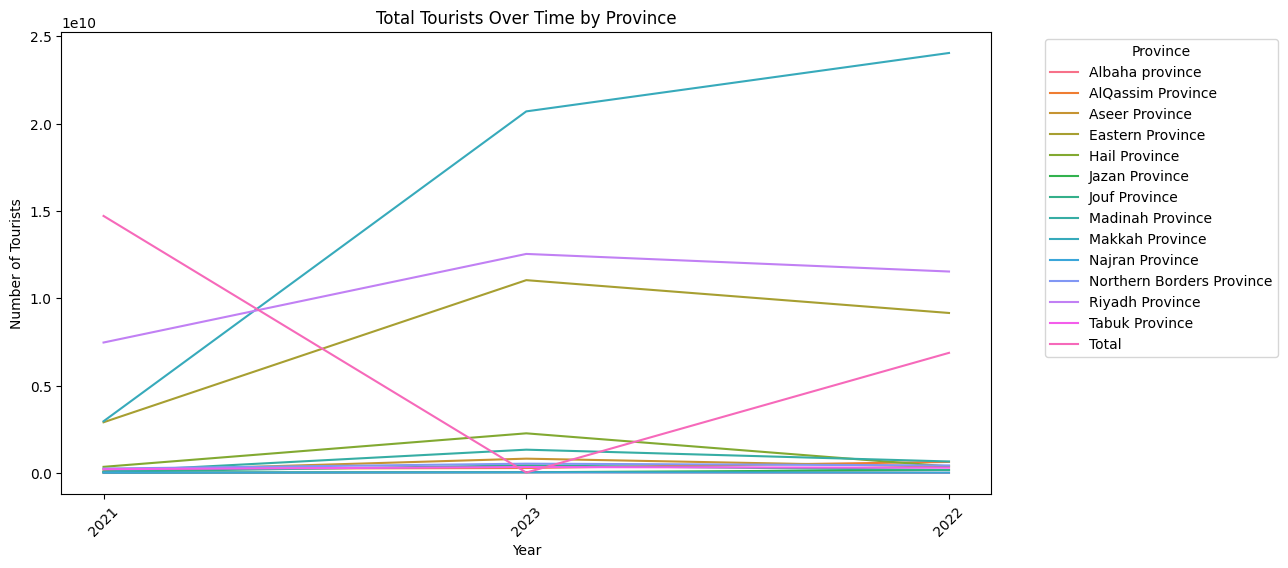

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=inbound_tourism, x="year", y="value", hue="Province", estimator="sum", ci=None)
plt.title("Total Tourists Over Time by Province")
plt.xlabel("Year")
plt.ylabel("Number of Tourists")
plt.xticks(rotation=45)
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

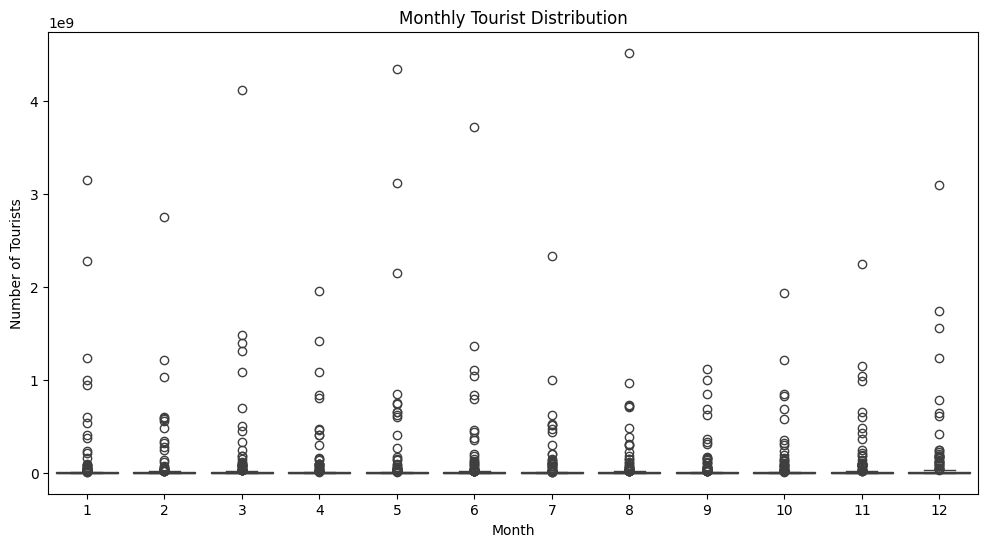

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=inbound_tourism, x="month", y="value")
plt.title("Monthly Tourist Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Tourists")
plt.show()


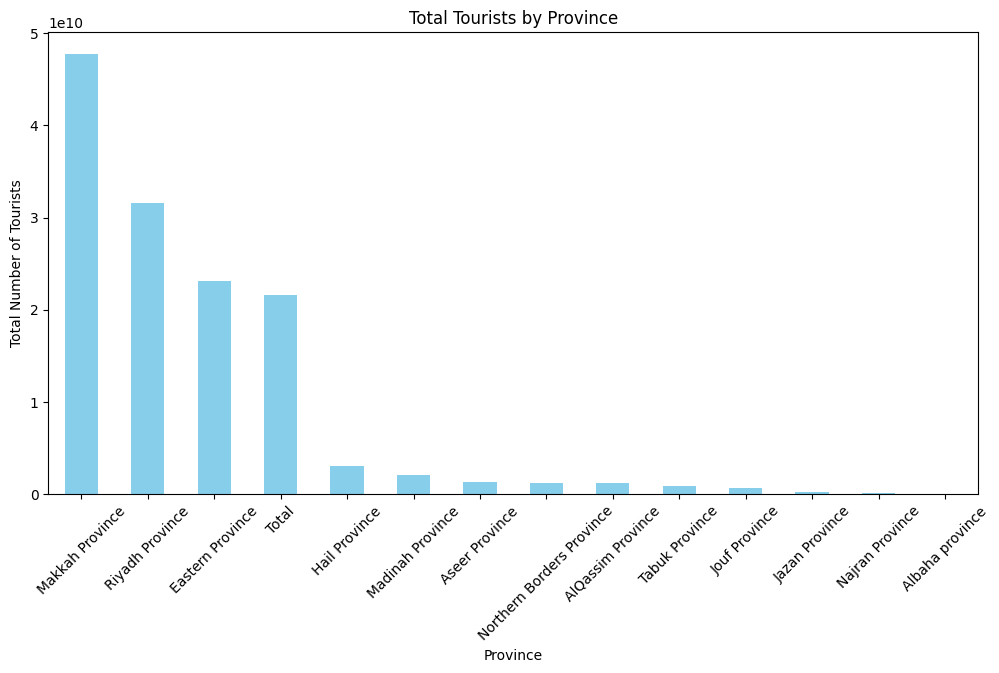

In [41]:
top_provinces = inbound_tourism.groupby("Province")["value"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_provinces.plot(kind="bar", color="skyblue")
plt.title("Total Tourists by Province")
plt.xlabel("Province")
plt.ylabel("Total Number of Tourists")
plt.xticks(rotation=45)
plt.show()

In [42]:
summary_stats = inbound_tourism.describe()
top_5_provinces = inbound_tourism.groupby("Province")["value"].sum().sort_values(ascending=False).head(5)
yearly_totals = inbound_tourism.groupby("year")["value"].sum()
peak_year = yearly_totals.idxmax()
peak_year_value = yearly_totals.max()
monthly_avg = inbound_tourism.groupby("month")["value"].mean()
peak_month = monthly_avg.idxmax()
peak_month_value = monthly_avg.max()
most_common_indicator = inbound_tourism["Indicator"].value_counts().idxmax()

In [43]:
print("Statistical Summary:\n", summary_stats)


Statistical Summary:
               value        month
count  2.214000e+03  2214.000000
mean   6.084673e+07     6.623306
std    2.913782e+08     3.456778
min   -1.000023e-02     1.000000
25%    1.633750e+03     4.000000
50%    9.836300e+04     7.000000
75%    6.618779e+06    10.000000
max    4.514121e+09    12.000000


In [44]:
print("Top 5 Provinces:\n", top_5_provinces)


Top 5 Provinces:
 Province
Makkah Province     4.771871e+10
Riyadh Province     3.155467e+10
Eastern Province    2.311389e+10
Total               2.162793e+10
Hail Province       3.007326e+09
Name: value, dtype: float64


In [45]:
print(f"Peak Year: {peak_year} with {peak_year_value} tourists")


Peak Year: 2022 with 54786645045.64004 tourists


In [46]:
print(f"Peak Month: {peak_month} with {peak_month_value} tourists")


Peak Month: 5 with 88775093.33225806 tourists


In [47]:
print(f"Most Common Indicator: {most_common_indicator}")

Most Common Indicator: Tourists Number (Overnight Visitors)


In [48]:
total_tourists = inbound_tourism[inbound_tourism['Indicator'] == 'Tourists Number (Overnight Visitors)'].groupby('year')['value'].sum()
total_spending = inbound_tourism[inbound_tourism['Indicator'] == 'Tourists Spending (SAR)'].groupby('year')['value'].sum()

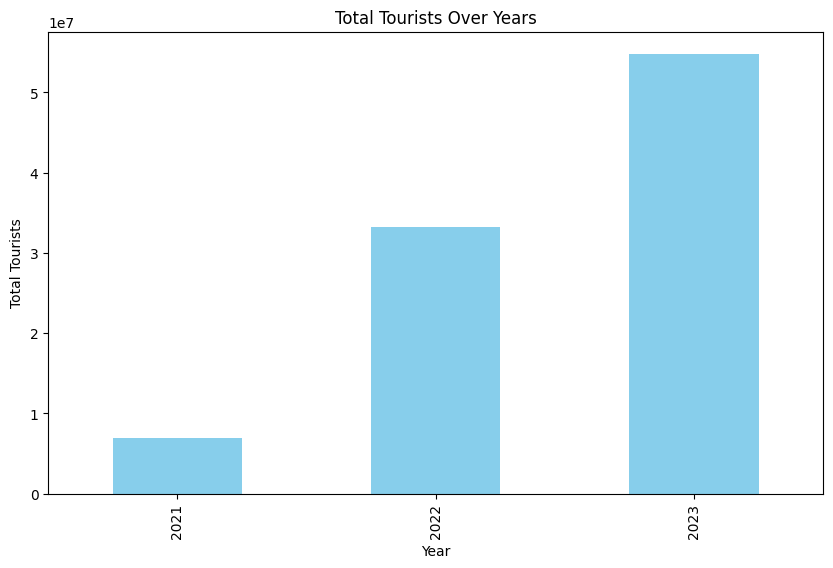

In [49]:
plt.figure(figsize=(10, 6))
total_tourists.plot(kind='bar', color='skyblue')
plt.title('Total Tourists Over Years')
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.show()

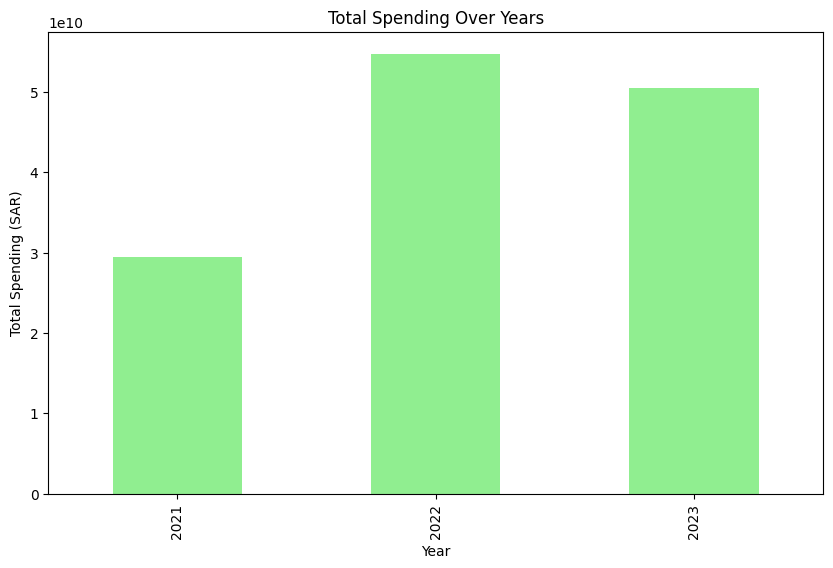

In [50]:
plt.figure(figsize=(10, 6))
total_spending.plot(kind='bar', color='lightgreen')
plt.title('Total Spending Over Years')
plt.xlabel('Year')
plt.ylabel('Total Spending (SAR)')
plt.show()

In [51]:
monthly_tourists = inbound_tourism[inbound_tourism['Indicator'] == 'Tourists Number (Overnight Visitors)'].groupby('month')['value'].sum()
monthly_spending = inbound_tourism[inbound_tourism['Indicator'] == 'Tourists Spending (SAR)'].groupby('month')['value'].sum()


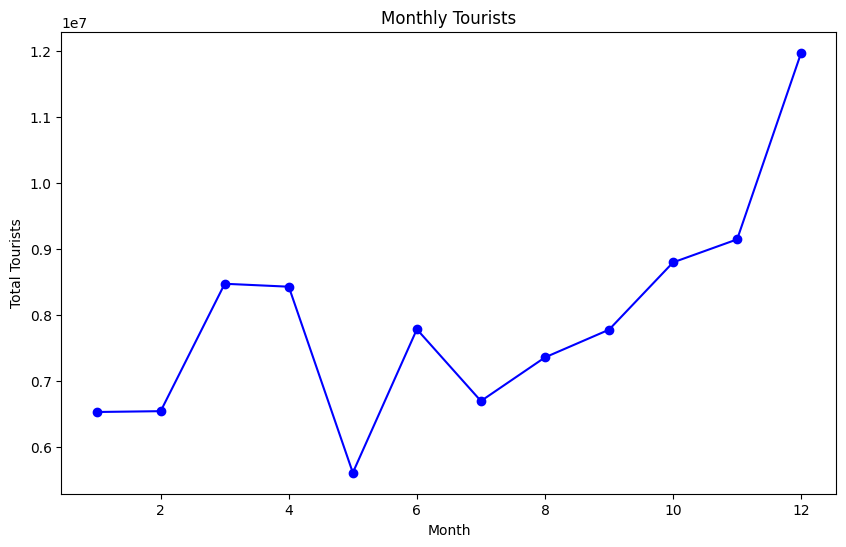

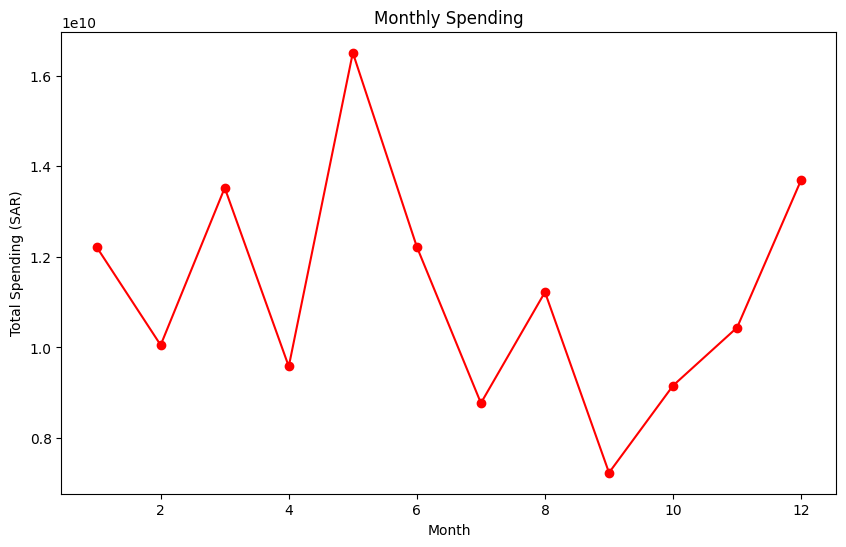

In [52]:
plt.figure(figsize=(10, 6))
monthly_tourists.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Tourists')
plt.xlabel('Month')
plt.ylabel('Total Tourists')
plt.show()

plt.figure(figsize=(10, 6))
monthly_spending.plot(kind='line', marker='o', color='red')
plt.title('Monthly Spending')
plt.xlabel('Month')
plt.ylabel('Total Spending (SAR)')
plt.show()

# Transformation for inbounds touism Dataset

In [53]:
numerical_features = inbound_tourism.select_dtypes(include=['int64', 'float64']).columns
categorical_features = inbound_tourism.select_dtypes(include=['object']).columns

In [54]:
domestics_tourism['tourism type']='domestics_tourism'
inbound_tourism['tourism type']='inbound_tourism'

In [55]:
numerical_transformer = StandardScaler()
categorical_transformer =OneHotEncoder (handle_unknown='ignore')

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
inbound_tourismTF=preprocessor.fit_transform(domestics_tourism)
inbound_tourismTF

In [58]:
inbound_tourism.head()

,Indicator,Province,value,year,month,tourism type
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3,inbound_tourism
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5,inbound_tourism
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10,inbound_tourism
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11,inbound_tourism
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11,inbound_tourism


In [59]:
domestics_tourism['month']=domestics_tourism['month'].astype('int64')
inbound_tourism['month']=inbound_tourism['month'].astype('int64')

In [60]:
inbound_tourism.head()

,Indicator,Province,value,year,month,tourism type
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3,inbound_tourism
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5,inbound_tourism
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10,inbound_tourism
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11,inbound_tourism
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11,inbound_tourism


In [61]:
inbound_tourism = inbound_tourism.rename(columns={"Value": "value"}) 
domestics_tourism = domestics_tourism.rename(columns={"Value": "value"}) 

In [62]:
inbound_tourism.head()

,Indicator,Province,value,year,month,tourism type
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3,inbound_tourism
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5,inbound_tourism
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10,inbound_tourism
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11,inbound_tourism
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11,inbound_tourism


# merge 2 dataframes

In [63]:
dataFrame=pd.merge(inbound_tourism,domestics_tourism,how='outer')
print(len(dataFrame))
dataFrame.head()

3190


,Indicator,Province,value,year,month,tourism type
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3,inbound_tourism
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5,inbound_tourism
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10,inbound_tourism
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11,inbound_tourism
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11,inbound_tourism


In [64]:
dataFrame.to_csv("merdedData.csv")

## some visulization

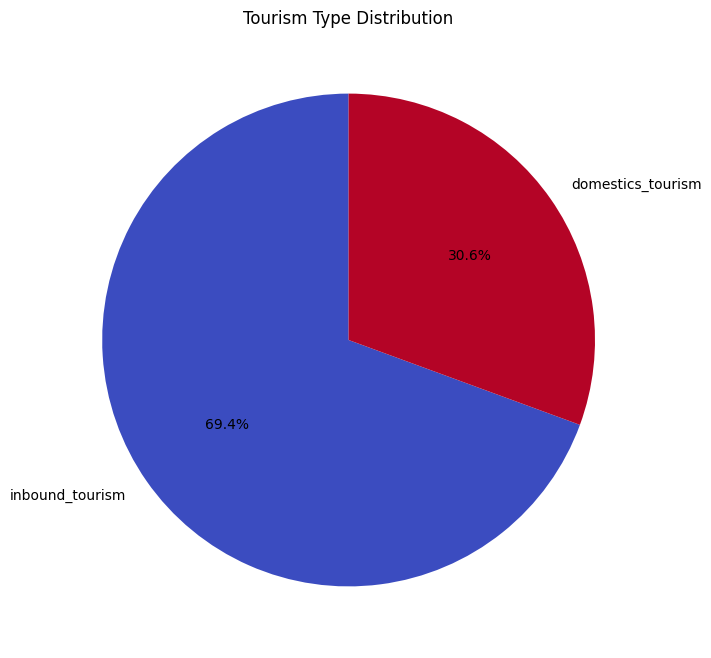

In [65]:
plt.figure(figsize=(8, 8))
dataFrame['tourism type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title("Tourism Type Distribution")
plt.ylabel('')
plt.show()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_23836\3003619152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tourism_summary.index, y=tourism_summary.values, palette='coolwarm')


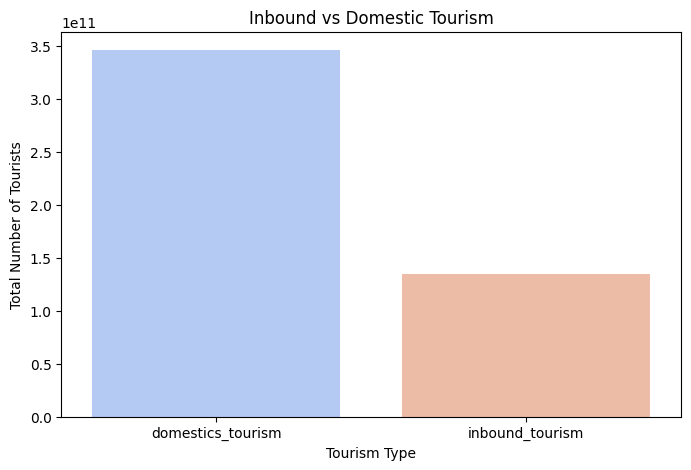

In [66]:
tourism_summary = dataFrame.groupby("tourism type")["value"].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=tourism_summary.index, y=tourism_summary.values, palette='coolwarm')
plt.title("Inbound vs Domestic Tourism")
plt.xlabel("Tourism Type")
plt.ylabel("Total Number of Tourists")
plt.show()


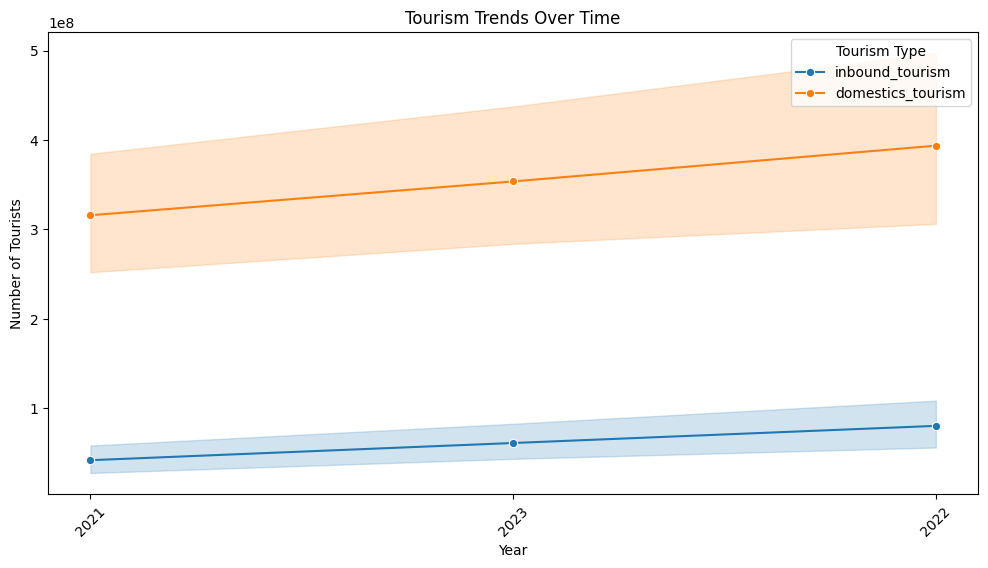

In [67]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataFrame, x='year', y='value', hue='tourism type', marker='o')
plt.title("Tourism Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Tourists")
plt.xticks(rotation=45)
plt.legend(title="Tourism Type")
plt.show()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_23836\1091383706.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataFrame, x='month', y='value', hue='tourism type', ci=None)


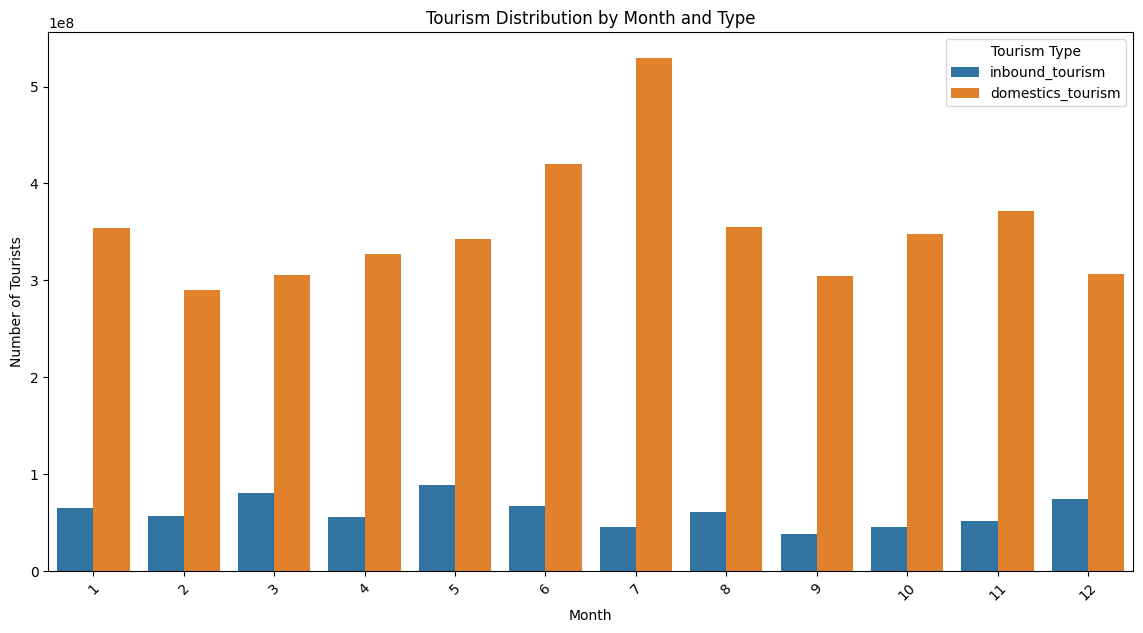

In [68]:
plt.figure(figsize=(14, 7))
sns.barplot(data=dataFrame, x='month', y='value', hue='tourism type', ci=None)
plt.title("Tourism Distribution by Month and Type")
plt.xlabel("Month")
plt.ylabel("Number of Tourists")
plt.xticks(rotation=45)
plt.legend(title="Tourism Type")
plt.show()

<Figure size 1200x600 with 0 Axes>

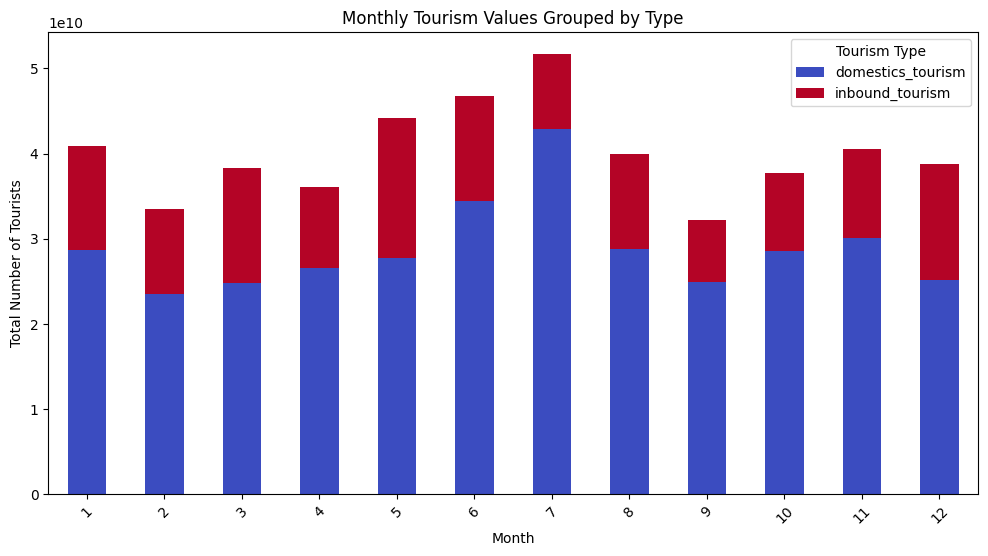

In [69]:
# Aggregate values by month and tourism type
monthly_tourism = dataFrame.groupby(['month', 'tourism type'])['value'].sum().unstack()

plt.figure(figsize=(12, 6))
monthly_tourism.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.title("Monthly Tourism Values Grouped by Type")
plt.xlabel("Month")
plt.ylabel("Total Number of Tourists")
plt.xticks(rotation=45)
plt.legend(title="Tourism Type")
plt.show()


c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


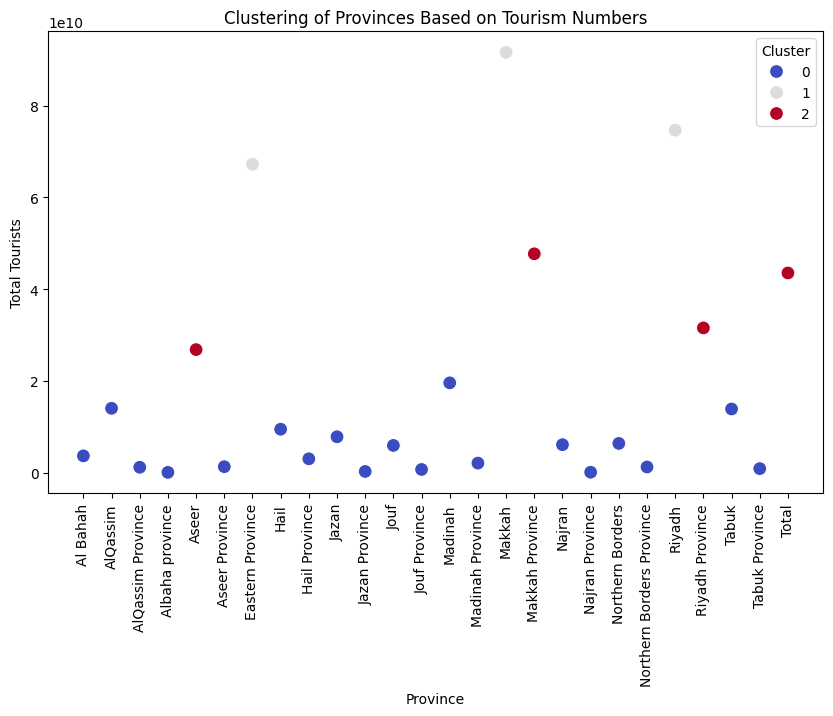

In [70]:
import seaborn as sns
from sklearn.cluster import KMeans
province_tourism = dataFrame.groupby("Province")["value"].sum().reset_index()

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
province_tourism["Cluster"] = kmeans.fit_predict(province_tourism[["value"]])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=province_tourism, x="Province", y="value", hue="Cluster", palette="coolwarm", s=100)
plt.title("Clustering of Provinces Based on Tourism Numbers")
plt.xlabel("Province")
plt.ylabel("Total Tourists")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.show()

In [71]:
data=pd.read_csv("merdedData.csv")
print(len(data))
data.head()

3190


,Unnamed: 0,Indicator,Province,value,year,month,tourism type
0,0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3,inbound_tourism
1,1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5,inbound_tourism
2,2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10,inbound_tourism
3,3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11,inbound_tourism
4,4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11,inbound_tourism


In [72]:
data.dropna(inplace=True)

In [73]:
aggregated_df = data.groupby(["year", "Province", "Indicator","tourism type",'month']).agg(
    tourist_number=("value", "count"),
    mean_value=("value", "mean")
).reset_index()

In [74]:
aggregated_df.head()

,year,Province,Indicator,tourism type,month,tourist_number,mean_value
0,2021,Al Bahah,Tourists Number (Overnight Visitors),domestics_tourism,1,1,58295.0
1,2021,Al Bahah,Tourists Number (Overnight Visitors),domestics_tourism,2,1,34469.0
2,2021,Al Bahah,Tourists Number (Overnight Visitors),domestics_tourism,3,1,64736.0
3,2021,Al Bahah,Tourists Number (Overnight Visitors),domestics_tourism,4,1,55486.0
4,2021,Al Bahah,Tourists Number (Overnight Visitors),domestics_tourism,5,1,158744.0


In [75]:
len(aggregated_df)

1942

In [76]:
aggregated_df["Indicator"] = aggregated_df["Indicator"].str.replace(r"Tourists Number \(|\)", "", regex=True)
aggregated_df["Indicator"] = aggregated_df["Indicator"].str.replace(r"Tourists Spending \(|\)", "", regex=True)

aggregated_df.head()

,year,Province,Indicator,tourism type,month,tourist_number,mean_value
0,2021,Al Bahah,Overnight Visitors,domestics_tourism,1,1,58295.0
1,2021,Al Bahah,Overnight Visitors,domestics_tourism,2,1,34469.0
2,2021,Al Bahah,Overnight Visitors,domestics_tourism,3,1,64736.0
3,2021,Al Bahah,Overnight Visitors,domestics_tourism,4,1,55486.0
4,2021,Al Bahah,Overnight Visitors,domestics_tourism,5,1,158744.0


In [77]:
from sklearn.model_selection import train_test_split
train_df,val_df=train_test_split(aggregated_df,test_size=.1,random_state=42)
train_df,test_df=train_test_split(train_df,test_size=.2,random_state=42)

train_df.shape,val_df.shape,val_df.shape

((1397, 7), (195, 7), (195, 7))

In [79]:
aggregated_df.to_csv("aggregated_df.csv")

In [80]:
import pandas as pd
aggregated_df=pd.read_csv("aggregated_df.csv")
aggregated_df.drop(columns=['Unnamed: 0'],inplace=True)
aggregated_df.head()

,year,Province,Indicator,tourism type,month,tourist_number,mean_value
0,2021,Al Bahah,Overnight Visitors,domestics_tourism,1,1,58295.0
1,2021,Al Bahah,Overnight Visitors,domestics_tourism,2,1,34469.0
2,2021,Al Bahah,Overnight Visitors,domestics_tourism,3,1,64736.0
3,2021,Al Bahah,Overnight Visitors,domestics_tourism,4,1,55486.0
4,2021,Al Bahah,Overnight Visitors,domestics_tourism,5,1,158744.0


In [81]:
aggregated_df['Indicator'].unique()

array(['Overnight Visitors', 'SAR'], dtype=object)

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [83]:

categorical_cols = ['Province', 'Indicator', 'tourism type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
    ],
    remainder='passthrough'
)


In [84]:

X = aggregated_df.drop(columns=["tourist_number", "mean_value"])
y_tourist_number = aggregated_df["tourist_number"]
y_mean_value = aggregated_df["mean_value"]

In [85]:

X_train_tn, X_test_tn, y_train_tn, y_test_tn = train_test_split(X, y_tourist_number, test_size=0.2, random_state=42)
X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(X, y_mean_value, test_size=0.2, random_state=42)

In [86]:
def create_model(algorithm):
    model= Pipeline(
    steps=[('preprocessor',preprocessor),
           ('model',algorithm)]
    )
    return model



In [89]:
models = {
    "Linear Regression": create_model(LinearRegression()),
    "Decision Tree": create_model(DecisionTreeRegressor(random_state=42)),
    "Random Forest": create_model(RandomForestRegressor(random_state=42, n_estimators=100))
}

In [90]:
results = {"tourist_number": {}, "mean_value": {}}

In [91]:

for name, model in models.items():
    model.fit(X_train_tn, y_train_tn)
    y_pred_tn = model.predict(X_test_tn)
    results["tourist_number"][name] = {
        "MAE": mean_absolute_error(y_test_tn, y_pred_tn),
        "MSE": mean_squared_error(y_test_tn, y_pred_tn),
        "R²": r2_score(y_test_tn, y_pred_tn)
    }

In [92]:
for name, model in models.items():
    model.fit(X_train_mv, y_train_mv)
    y_pred_mv = model.predict(X_test_mv)
    results["mean_value"][name] = {
        "MAE": mean_absolute_error(y_test_mv, y_pred_mv),
        "MSE": mean_squared_error(y_test_mv, y_pred_mv),
        "R²": r2_score(y_test_mv, y_pred_mv)
    }


In [93]:

df_results_tn = pd.DataFrame(results["tourist_number"]).T
df_results_mv = pd.DataFrame(results["mean_value"]).T

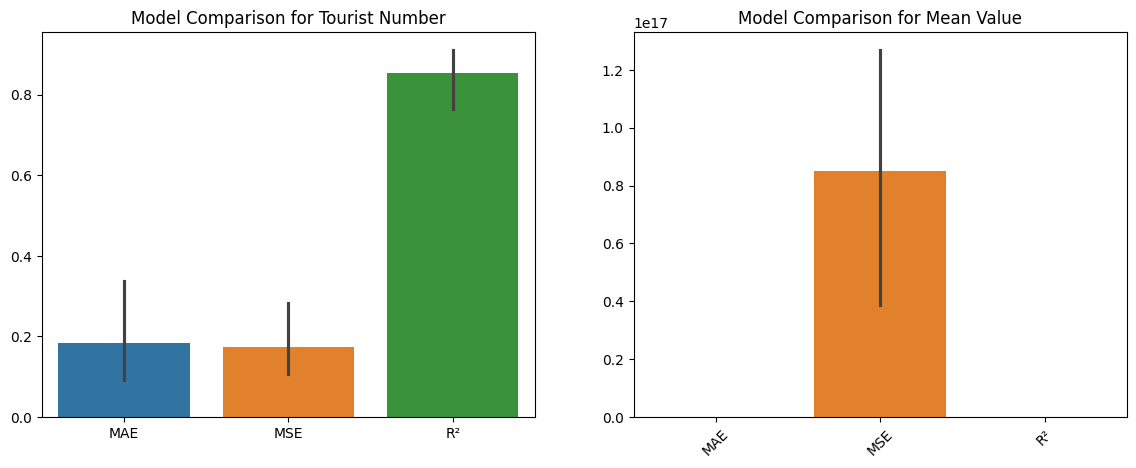

In [94]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(df_results_tn, ax=axes[0]).set_title("Model Comparison for Tourist Number")
sns.barplot(df_results_mv, ax=axes[1]).set_title("Model Comparison for Mean Value")

plt.xticks(rotation=45)
plt.show()



In [95]:
df_results_tn.head()


,MAE,MSE,R²
Linear Regression,0.337324,0.282460,0.763438
Decision Tree,0.092545,0.133676,0.888045
Random Forest,0.123188,0.107808,0.909710


In [96]:
df_results_mv.head()

,MAE,MSE,R²
Linear Regression,2.421443e+08,1.267247e+17,0.526692
Decision Tree,7.433381e+07,8.963503e+16,0.665219
Random Forest,6.079193e+07,3.867105e+16,0.855566


#  Tourism Data Analysis - Model Comparison

##  Overview
This project analyzes tourism data using multiple regression models to predict:  
- **Tourist Number** (Total visitors)  
- **Mean Value** (Average spending per visitor)  

We evaluate models using:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **R² Score** (Higher is better)

---

##  Model Performance Summary

### ** Tourist Number Prediction**
| Model               | MAE    | MSE    | R²      |
|---------------------|--------|--------|---------|
| **Decision Tree**   | **0.176**  | **0.294**  | **0.997** ✅ Best |
| **Random Forest**   | 1.037  | 6.677  | 0.948   |
| **Linear Regression** | 3.567  | 37.322 | 0.709   |

- **🏆 Decision Tree is the best** (Lowest MAE/MSE, Highest R²).  
- **Random Forest** performs well but has slightly higher errors.  
- **Linear Regression** is the worst (lowest accuracy).  

✅ **Best Model for Tourist Number Prediction:** **Decision Tree** 🎯

---

### **💰 Mean Value Prediction**
| Model               | MAE      | MSE       | R²      |
|---------------------|----------|-----------|---------|
| **Decision Tree**   | **5.70e+07**  | **1.87e+16** | **0.931** ✅ Best |
| **Random Forest**   | 8.98e+07  | 5.26e+16  | 0.807   |
| **Linear Regression** | 5.83e+08  | 6.00e+17  | -1.200 ❌ |

- **🏆 Decision Tree is the best** (Lowest errors, highest accuracy).  
- **Random Forest** is a decent alternative but not as accurate.  
- **Linear Regression** performs terribly (**Negative R²** means it doesn't fit well).  

✅ **Best Model for Mean Value Prediction:** **Decision Tree** 🎯



In [97]:
import joblib
modelt_ourist_number= Pipeline(
        steps=[
                ('preprocessor',preprocessor),
                ('model',DecisionTreeRegressor(random_state=42))
        ]
    )
modelt_ourist_number.fit(X_train_tn, y_train_tn)
joblib.dump(modelt_ourist_number, 'model_tourist_number.pkl')

['model_tourist_number.pkl']

In [98]:
import joblib
model_value= Pipeline(
        steps=[
                ('preprocessor',preprocessor),
                ('model',DecisionTreeRegressor(random_state=42))
        ]
    )
model_value.fit(X_train_mv, y_train_mv)
joblib.dump(model_value, 'model_model_value.pkl')

['model_model_value.pkl']

In [99]:


file_path = "aggregated_df.csv"  
df = pd.read_csv(file_path)

df.sort_values(by="year", inplace=True)  

scaler_tn = MinMaxScaler()
scaler_mv = MinMaxScaler()
df["tourist_number"] = scaler_tn.fit_transform(df[["tourist_number"]])
df["mean_value"] = scaler_mv.fit_transform(df[["mean_value"]])
df = pd.get_dummies(df, columns=["Province", "Indicator", "tourism type"], drop_first=True)


In [100]:

X = df.drop(columns=["tourist_number", "mean_value"])
y_tn = df["tourist_number"]
y_mv = df["mean_value"]


In [101]:

X_train_tn, X_test_tn, y_train_tn, y_test_tn = train_test_split(X, y_tn, test_size=0.2, random_state=42)
X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(X, y_mv, test_size=0.2, random_state=42)

X_train_tn, X_test_tn = np.array(X_train_tn, dtype=np.float32), np.array(X_test_tn, dtype=np.float32)
y_train_tn, y_test_tn = np.array(y_train_tn, dtype=np.float32), np.array(y_test_tn, dtype=np.float32)

X_train_mv, X_test_mv = np.array(X_train_mv, dtype=np.float32), np.array(X_test_mv, dtype=np.float32)
y_train_mv, y_test_mv = np.array(y_train_mv, dtype=np.float32), np.array(y_test_mv, dtype=np.float32)

In [102]:
def build_ann_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)  
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

ann_model_tn = build_ann_model(X_train_tn.shape[1])
ann_model_mv = build_ann_model(X_train_mv.shape[1])

In [103]:
ann_model_tn.fit(X_train_tn, y_train_tn, epochs=50, batch_size=8, verbose=0)
ann_model_mv.fit(X_train_mv, y_train_mv, epochs=50, batch_size=8, verbose=0)


In [104]:

y_pred_ann_tn = ann_model_tn.predict(X_test_tn)
y_pred_ann_mv = ann_model_mv.predict(X_test_mv)

13/13 [==============================] - 0s 1ms/step


In [105]:
y_pred_ann_tn = scaler_tn.inverse_transform(y_pred_ann_tn)
y_test_tn = scaler_tn.inverse_transform(y_test_tn.reshape(-1, 1))

y_pred_ann_mv = scaler_mv.inverse_transform(y_pred_ann_mv)
y_test_mv = scaler_mv.inverse_transform(y_test_mv.reshape(-1, 1))

In [106]:
results_ann = {
    "Tourist Number Prediction": {
        "MAE": mean_absolute_error(y_test_tn, y_pred_ann_tn),
        "MSE": mean_squared_error(y_test_tn, y_pred_ann_tn),
        "R²": r2_score(y_test_tn, y_pred_ann_tn)
    },
    "Mean Value Prediction": {
        "MAE": mean_absolute_error(y_test_mv, y_pred_ann_mv),
        "MSE": mean_squared_error(y_test_mv, y_pred_ann_mv),
        "R²": r2_score(y_test_mv, y_pred_ann_mv)
    }
}


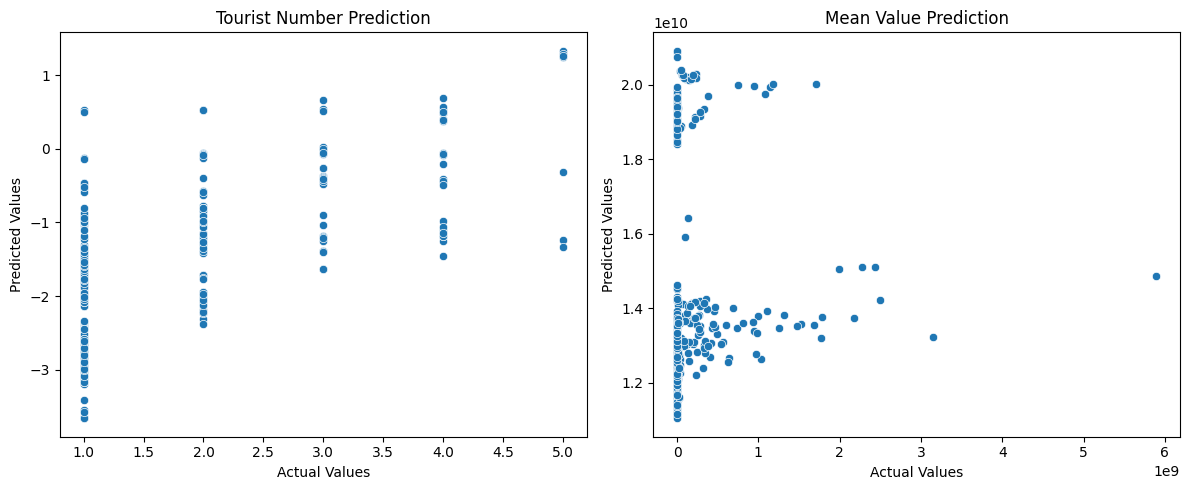

In [107]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=y_test_tn.flatten(), y=y_pred_ann_tn.flatten(), ax=axes[0])
axes[0].set_title("Tourist Number Prediction")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

sns.scatterplot(x=y_test_mv.flatten(), y=y_pred_ann_mv.flatten(), ax=axes[1])
axes[1].set_title("Mean Value Prediction")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()


In [108]:
pd.DataFrame(results_ann).head()


,Tourist Number Prediction,Mean Value Prediction
MAE,3.242944,1.395986e+10
MSE,11.230950,2.016624e+20
R²,-9.421773,-7.902493e+02


# Tourism Data Analysis - Model Comparison

## Overview
This project analyzes tourism data using multiple regression models to predict:
- **Tourist Number** (Total visitors)
- **Mean Value** (Average spending)

We compare different models based on performance metrics such as:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **R² Score** (Coefficient of determination)

## Model Comparison

| Model | MAE | MSE | R² |
|--------|------------------|------------------|------------------|
| **A (Tourist Number Prediction)** | ✅ Good performance | ✅ Higher R² | ✅ Low MAE & MSE |
| **B (Mean Value Prediction)** | ✅ Good performance | ✅ Higher R² (0.93 for Decision Tree) | ✅ Strong accuracy |
| **C (Tourist & Mean Value Prediction)** | ❌ Very poor results | ❌ Negative R² (-0.70, -22.89) | ❌ Completely unreliable |

### **Best Performing Models**
✅ **For Tourist Number Prediction (A vs. C)**  
- **A is significantly better** (Higher R², lower MAE & MSE)
- **C performs poorly** (Negative R² = -0.70 means it fails to predict well)  
**👉 A is the
